# Smart_Stock_ML: Classification

## Setup and Explore the data

In [78]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import ensemble
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


#  Import completed dataset
sp500_company_ml_df = pd.read_csv("data/sp500_company_ml.csv")
sp500_company_ml_df.head()

,Year,Outperformed?,Interest Rate (Federal Funds Effective Rate),CPI,UnemploymentRate,GDPGrowthRate,GICS Sector,GICS Sub-Industry,Founded,Gender,CEO Transition,Tenure Bucket,HQ_US_State_or_Country,Salary_Bucket
0,2015,1,0.11,0.1,5.3,2.9,Health Care,Life Sciences Tools & Services,1999,M,1.0,<= 2 years,California,"(15000000, 20000000]"
1,2016,1,0.34,1.3,4.9,1.8,Health Care,Life Sciences Tools & Services,1999,M,0.0,<= 2 years,California,"(15000000, 20000000]"
2,2017,1,0.65,2.1,4.4,2.5,Health Care,Life Sciences Tools & Services,1999,M,0.0,<= 2 years,California,"(15000000, 20000000]"
3,2018,1,1.41,2.4,3.9,3.0,Health Care,Life Sciences Tools & Services,1999,M,0.0,2 to 5 years,California,"(15000000, 20000000]"
4,2019,0,2.40,1.8,3.7,2.5,Health Care,Life Sciences Tools & Services,1999,M,0.0,2 to 5 years,California,"(15000000, 20000000]"


In [79]:
# View data info
sp500_company_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          4366 non-null   int64  
 1   Outperformed?                                 4366 non-null   int64  
 2   Interest Rate (Federal Funds Effective Rate)  4366 non-null   float64
 3   CPI                                           4366 non-null   float64
 4   UnemploymentRate                              4366 non-null   float64
 5   GDPGrowthRate                                 4366 non-null   float64
 6   GICS Sector                                   4366 non-null   object 
 7   GICS Sub-Industry                             4366 non-null   object 
 8   Founded                                       4366 non-null   object 
 9   Gender                                        4366 non-null   o

In [80]:
# Determine the number of unique values in each column.
sp500_company_ml_df.nunique()

Year                                              9
Outperformed?                                     2
Interest Rate (Federal Funds Effective Rate)      9
CPI                                               9
UnemploymentRate                                  9
GDPGrowthRate                                     7
GICS Sector                                      11
GICS Sub-Industry                               124
Founded                                         161
Gender                                            2
CEO Transition                                    2
Tenure Bucket                                     4
HQ_US_State_or_Country                           49
Salary_Bucket                                     7
dtype: int64

## Supervised learning: Classifiers

### Preprocessing

In [81]:
# Convert categorical data to numeric with `pd.get_dummies`
sp500_numeric_df = pd.get_dummies(sp500_company_ml_df, dtype=int).drop('Gender_M', axis=1)

In [88]:
sp500_numeric_df.columns

Index(['Year', 'Outperformed?', 'Interest Rate (Federal Funds Effective Rate)',
       'CPI', 'UnemploymentRate', 'GDPGrowthRate', 'CEO Transition',
       'GICS Sector_Communication Services',
       'GICS Sector_Consumer Discretionary', 'GICS Sector_Consumer Staples',
       ...
       'HQ_US_State_or_Country_Virginia', 'HQ_US_State_or_Country_Washington',
       'HQ_US_State_or_Country_Wisconsin', 'Salary_Bucket_(0, 5000000]',
       'Salary_Bucket_(10000000, 15000000]',
       'Salary_Bucket_(15000000, 20000000]',
       'Salary_Bucket_(20000000, 25000000]',
       'Salary_Bucket_(25000000, 50000000]',
       'Salary_Bucket_(5000000, 10000000]',
       'Salary_Bucket_(50000000, 300000000]'],
      dtype='object', length=364)

In [89]:
# Split the preprocessed data into features and target arrays
y = sp500_numeric_df['Outperformed?'].values
X = sp500_numeric_df.drop(columns=['Outperformed?'], axis=1).values
X_columns = sp500_numeric_df.drop(columns=['Outperformed?'], axis=1).columns

In [90]:
X_columns

Index(['Year', 'Interest Rate (Federal Funds Effective Rate)', 'CPI',
       'UnemploymentRate', 'GDPGrowthRate', 'CEO Transition',
       'GICS Sector_Communication Services',
       'GICS Sector_Consumer Discretionary', 'GICS Sector_Consumer Staples',
       'GICS Sector_Energy',
       ...
       'HQ_US_State_or_Country_Virginia', 'HQ_US_State_or_Country_Washington',
       'HQ_US_State_or_Country_Wisconsin', 'Salary_Bucket_(0, 5000000]',
       'Salary_Bucket_(10000000, 15000000]',
       'Salary_Bucket_(15000000, 20000000]',
       'Salary_Bucket_(20000000, 25000000]',
       'Salary_Bucket_(25000000, 50000000]',
       'Salary_Bucket_(5000000, 10000000]',
       'Salary_Bucket_(50000000, 300000000]'],
      dtype='object', length=363)

In [91]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [92]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler instance
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Classifier modeling

----------------------------------------------
Confusion Matrix: KNeighborsClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,296,267
Actual > SP500,253,276


Classification report: KNeighborsClassifier


,precision,recall,f1-score,support
Less than SP500 CAGR,0.539,0.526,0.532,563.0
Outperformed SP500 CAGR,0.508,0.522,0.515,529.0
accuracy,,,0.524,
macro avg,0.524,0.524,0.524,1092.0
weighted avg,0.524,0.524,0.524,1092.0


KNeighborsClassifier does not have feature_importances_ attribute.
                                                          
----------------------------------------------
Confusion Matrix: ExtraTreesClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,380,183
Actual > SP500,196,333


Classification report: ExtraTreesClassifier


,precision,recall,f1-score,support
Less than SP500 CAGR,0.66,0.675,0.667,563.0
Outperformed SP500 CAGR,0.645,0.629,0.637,529.0
accuracy,,,0.653,
macro avg,0.653,0.652,0.652,1092.0
weighted avg,0.653,0.653,0.653,1092.0


Feature Importances for ExtraTreesClassifier:
0.052944: Interest Rate (Federal Funds Effective Rate)
0.048522: CPI
0.047096: Year
0.043427: GDPGrowthRate
0.042740: UnemploymentRate
0.017238: Tenure Bucket_5 to 10 years
0.017085: Tenure Bucket_2 to 5 years
0.016292: Tenure Bucket_<= 2 years
0.014164: Tenure Bucket_10+ years
0.013621: Salary_Bucket_(10000000, 15000000]
0.012058: GICS Sector_Information Technology
0.011944: Salary_Bucket_(15000000, 20000000]
0.010432: Salary_Bucket_(5000000, 10000000]


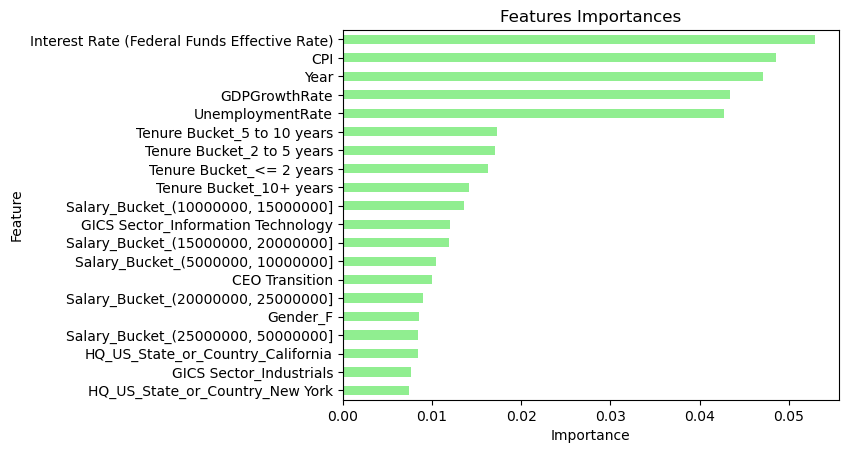

                                                          
----------------------------------------------
Confusion Matrix: RandomForestClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,380,183
Actual > SP500,188,341


Classification report: RandomForestClassifier


,precision,recall,f1-score,support
Less than SP500 CAGR,0.669,0.675,0.672,563.0
Outperformed SP500 CAGR,0.651,0.645,0.648,529.0
accuracy,,,0.66,
macro avg,0.66,0.66,0.66,1092.0
weighted avg,0.66,0.66,0.66,1092.0


Feature Importances for RandomForestClassifier:
0.041571: Interest Rate (Federal Funds Effective Rate)
0.038978: Year
0.037987: CPI
0.037373: UnemploymentRate
0.034189: GDPGrowthRate
0.014948: Tenure Bucket_5 to 10 years
0.014524: GICS Sector_Information Technology
0.014498: Tenure Bucket_<= 2 years
0.014371: Tenure Bucket_2 to 5 years
0.013636: Tenure Bucket_10+ years
0.012473: Salary_Bucket_(10000000, 15000000]
0.011942: Salary_Bucket_(5000000, 10000000]
0.011924: Salary_Bucket_(15000000, 20000000]


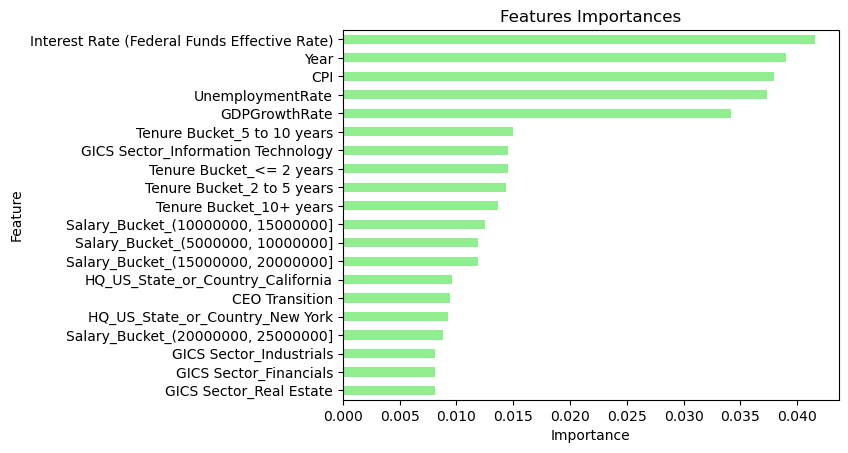

                                                          
----------------------------------------------
Confusion Matrix: BaggingClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,376,187
Actual > SP500,176,353


Classification report: BaggingClassifier


,precision,recall,f1-score,support
Less than SP500 CAGR,0.681,0.668,0.674,563.0
Outperformed SP500 CAGR,0.654,0.667,0.66,529.0
accuracy,,,0.668,
macro avg,0.667,0.668,0.667,1092.0
weighted avg,0.668,0.668,0.668,1092.0


BaggingClassifier does not have feature_importances_ attribute.
                                                          


In [94]:
# Create a dictionary of different ml models to run in the loop
ml = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "ExtraTreesClassifier": ensemble.ExtraTreesClassifier(n_estimators=50, random_state=78),
#     "LogisticsRegression": LogisticRegression(random_state=78, max_iter=1000),
    "RandomForestClassifier": ensemble.RandomForestClassifier(n_estimators=50, random_state=78),
    "BaggingClassifier": ensemble.BaggingClassifier(n_estimators=50, random_state=78),
#     "AdaBoostClassifier": ensemble.AdaBoostClassifier(n_estimators=100, random_state=78, algorithm='SAMME') 
}
report_data = []

for x in ml:
    model = ml[x]
    model.fit(X_train_scaled, y_train)# Create predictions
    y_pred = model.predict(X_test_scaled)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    
    # Calculating the confusion matrix and display as a dataframe
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(
        cm, index=["Actual < SP500", "Actual > SP500"], columns=["Predicted < SP500", "Predicted > SP500"]
    )
    print(f"----------------------------------------------")
    print(f"Confusion Matrix: {x}")
    display(cm_df)
    
    # Calculate report metrics
    target_names = ["Less than SP500 CAGR", "Outperformed SP500 CAGR"]
    report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
    results = {
        "Less than SP500 CAGR": report["Less than SP500 CAGR"],
        "Outperformed SP500 CAGR": report["Outperformed SP500 CAGR"],
        "accuracy": report["accuracy"],
        "macro avg": report["macro avg"],
        "weighted avg": report["weighted avg"]
    }
    # Save report results and display as a dataframe
    report_data.append({**results})
    results_df = pd.DataFrame(results).transpose().round(3)
    results_df = results_df.astype(object)
    results_df.loc["accuracy", results_df.columns != 'f1-score'] = ""
    print(f"Classification report: {x}")
    display(results_df)
    
    # Check if the model has feature_importances_ attribute and print if true
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_names = X_columns
        sorted_importances = sorted(zip(feature_importances, feature_names), reverse=True)
        
        print(f"Feature Importances for {x}:")
        for importance, name in sorted_importances:
            if importance >= 0.01:
                print(f"{importance:.6f}: {name}")
                
         # Visualize the features by importance
        importances_df = pd.DataFrame(sorted_importances)
        importances_df.set_index(importances_df[1], inplace=True)
        importances_df.drop(columns=1, inplace=True)
        importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
        importances_sorted_df = importances_df.sort_values(by='Feature Importances', ascending=False)
        top_importances_df = importances_sorted_df.head(20)
        ax = top_importances_df.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
        ax.invert_yaxis()
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
                
    else:
        print(f"{x} does not have feature_importances_ attribute.")
    print("                                                          ")